In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab06.ipynb")

<img src="data6.png" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Lab 6 – Histograms and Summary Statistics

## Introduction to Computational Thinking with Data Science and Society

In our last lab, we worked with scatter and line plots. But what if we want to visualize the distribution of one set of numbers? 

We can use a *histogram* to do exactly that! Although it looks like a bar chart, there are some important differences. Rather than visualizing a quantity across categorical variables, we typically use histograms to visualize the values in *one column* of a table.

Since then we've also learned about summary statistics, which are used to summarize a set of observations. These numbers often describe data distributions, though they are certainly not replacements for visualizations, which can describe the entire distribution in more interpretable detail.

In [ ]:
# Run this cell to load all required Python libraries
import numpy as np
from datascience import *

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

<hr style="border: 1px solid #fdb515;" />

## [Tutorial] Where `barh` fails

The `barh` method works well on categorical variables, but what if we have a **numerical** variable that we want to see the distribution of? 

Consider the Data Scientist salary data we've been using from [Kaggle](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data). In this lab, we'll use the cleaned dataset, where Education Levels are one of four categories: High School, Bachelor's Degree, Master's Degree, and PhD.

In [ ]:
salary = Table.read_table("salary.csv")
salary.show(5)

Let's see what happens if we try to use `barh` on a numerical variable (`"Years of Experience"`) instead of a categorical variable:

In [ ]:
# just run this cell
salary.group('Years of Experience').barh('Years of Experience')

As you can see, this bar plot is not particularly helpful. There are many categories that seem to not have any corresponding bar. Yet, that isn't the case! Seeing the breakdown of `"Years of Experience"` does not provide us with any useful information, and it is also difficult to read or understand. Instead, for numerical variables, we have another visualization method that helps us visualize a numerical variable's distribution: **histograms**.

---
### **The [hist](http://data8.org/datascience/_autosummary/datascience.tables.Table.hist.html#datascience.tables.Table.hist) method**

The `hist` method allows us to see the distribution of a numerical variable. `hist` takes in 1 mandatory argument and has several optional arguments (feel free to look through the documentation and explore these optional arguments as before). **Remember: categorical variables should be visualized using `barh`, and numerical variables should be visualized using `hist`.**

Let's take a look at the distribution of years of experience among people to see how the `hist` method helps visualize numerical variables. We'll use the `salary` table to create this histogram.

In [ ]:
salary.hist("Years of Experience")

The above histogram represents the area of each bin as the percentage of values in that bin. We could optionally set `density=False` to plot our distribution using **counts** per bin:

In [ ]:
# Just run this cell
salary.hist("Years of Experience", density=False)

Later in this lab, we will explore the tradeoffs of plotting counts vs. percentages of bins. For now, let us consider what the number and sizes of bins tell us.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Employee Salaries

Consider the following line of code, which produces a histogram representing the **distribution of employee salaries**:

In [ ]:
salary.hist("Salary")

Changing the number of bins can change the appearance of a histogram, which can either reveal or hide patterns within the data.

By default, the `hist` Table method automatically chooses ten equally-spaced bins for the data.  The `hist` Table method has an optional `bins` argument to customize bins. It takes two possible types of values:
* **int**: Plot n equally-spaced bins.
* **array**: To specify n bins, provide an (n+1)-length array. The first n array elements specify the left endpoints of each bin, in order. The last array element specifies the right endpoint of the last bin.

Let's explore adjusting the number of bins first.

<!-- BEGIN QUESTION -->


---

### Question 1(a)

Set the number of bins to 20 and plot a new histogram. 

<!-- END QUESTION -->

_Discuss with a partner_: How does the distribution of the datapoints look? Are you able to interpret the patterns and details within the data.

<!-- BEGIN QUESTION -->


---

### Question 1(b)

Next, consider setting the number of bins to 3 or 2000. How does the distribution of the datapoints look? Briefly answer whether you are able to interpret the patterns and details within the data. We've provided a code cell in case it is useful.

In [ ]:
# YOUR CODE HERE

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->


---

### Question 1(c)

Based on the results of manipulating the bins in the previous parts, which bin selection produced the most interpretable histogram: 3, 10, 20, or 2000? Why?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 2: Bachelor's Degree vs. PhD Degree

Next, we'll explore a functionality of histograms that allows us to compare the salaries of Bachelor's degree holders vs. those of PhD holders. We can use `hist` on a `Table` with the rows for just these two education levels and use the optional `group` argument.

*Note*: You'll see how `are.contained_in` works with the `where` method in the next lab. For now, think of it as finding any rows corresponding to *either* `"Bachelor's Degree"` or `"PhD Degree"`.

In [ ]:
# just run this cell to create the `bachelor_master` table
bachelor_phd = salary.where("Education Level", are.contained_in(["Bachelor's Degree", "PhD"]))
bachelor_phd.show(5)

<!-- BEGIN QUESTION -->

### Question 2(a)
Now that we've created our `bachelor_phd` table, fill in the following code cell to produce a histogram representing the ***distribution of salary*** for *both* people with a Bachelor's degree and people with a PhD.

*Hint*: Take a look at the optional `group` argument in the documentation.

*Note*: Set the optional `bins` argument of the `hist` method to `my_bins`. We've provided this variable for you.

In [ ]:
my_bins = np.arange(0, 300000, 10000)
...

<!-- END QUESTION -->

When analyzing histograms, data scientists often have to describe their distribution (shape) of the histogram, using some of the following terms:


*   **Center:** A value that summarizes the midpoint of the datapoints' distribution.
*   **Spread:** How much the datapoints vary, i.e., the width of the distribution.
Screenshot 2025-03-20 at 12.11.45 AM.png

*   **Skew:** Which way the data "leans". A right skew means that more of the data is on the left and the tail of the data is on the right. A left skew means that more of the data is on the right and the tail of the data is on the left.
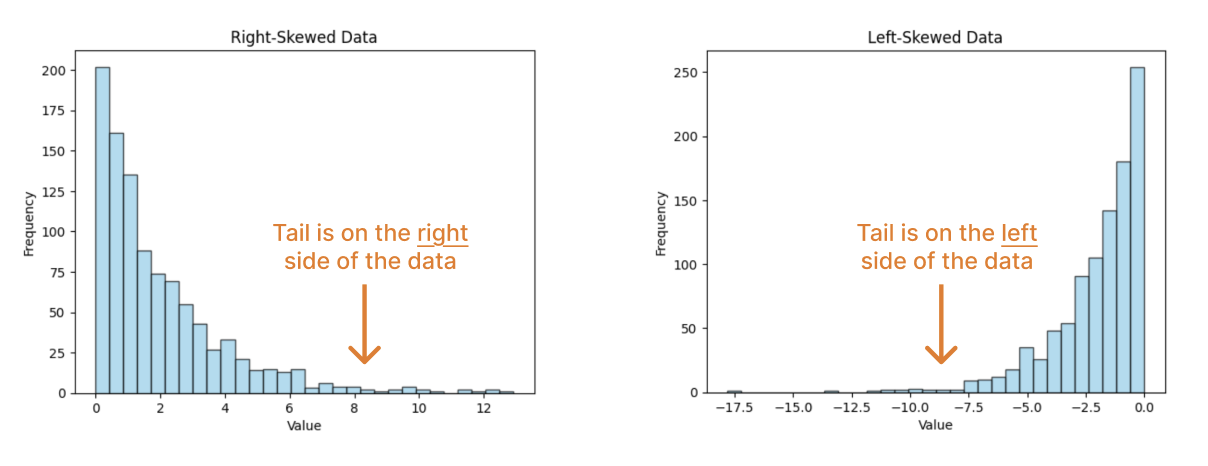

<!-- BEGIN QUESTION -->

---

### Question 2(b)

What skew does the Bachelor degree salary distribution have? Assign `skew_bachelor` to the string "left" or "right".

In [ ]:
skew_bachelor = ...

<!-- END QUESTION -->

---

### Question 2(c)

Let's consider how summary statistics might interplay with this notion of skew.

Fill in the below code to compute the means and medians of both the Bachelor's degree salary distribution and the PhD salary distribution. The `bachelor` and `phd` arrays have been created for your convenience.

In [ ]:
bachelor = bachelor_phd.where("Education Level", "Bachelor's Degree").column("Salary")
phd = bachelor_phd.where("Education Level", "PhD").column("Salary")

In [ ]:
mean_bachelor = ...
median_bachelor = ...
print(f"Bachelor's degree:\tmean: {mean_bachelor}\tmedian: {median_bachelor}")

mean_phd = ...
median_phd = ...
print(f"PhD:\t\t\tmean: {mean_phd}\tmedian: {median_phd}")

In [ ]:
grader.check("q2_c")

---
### Question 2(d)

Based on the numbers above, complete the below statement:
> A right skew (i.e., tail on right) implies that the mean is _______ the median.

Fill in the blank by assigning `q_2d` to `"less than"`, `"equal to"`, or `"greater than"`.

In [ ]:
q_2d = ...

In [ ]:
grader.check("q2_d")

<hr style="border: 1px solid #fdb515;" />

## [Tutorial] Counts or Density?

It should be noted that there are many more individuals with a Bachelor's degree than a PhD:

In [ ]:
bachelor_phd.group("Education Level")

This difference in sample sizes can impact our analysis.

<div class="alert alert-warning">
Here is where we could have arrived at some unreliable conclusions: for all the histograms in this lab so far, we've been taking a look at the density plots of these histograms, in which the y-axis is displayed in percent per unit rather than simply count. Let's take a look at what the plot could have looked like, if we were choosing to make count plots for our histograms instead:
</div>

In [ ]:
my_bins = np.arange(0, 180000, 10000)
bachelor_phd.hist("Salary", density = False, group = "Education Level", bins = my_bins)

<div class="alert alert-warning">
When we make use of the <code>density = False</code> argument, we see that the y-axis plots the <strong>counts of individuals</strong> instead. As we discovered earlier, the sample sizes of the bachelor's holders vs. PhD holders in this dataset are quite different, and so it's difficult to draw any reliable conclusions from the plot above. When using histograms to visualize data in the future, pay attention to whether a density distribution or a count distribution makes the most sense and is the most reliable for drawing conclusions!
</div>

---

## Question 3: Box plots and percentiles

Finally, let's compare the salaries of different degree holders using box plots.

Note: In this class, you are expected to be able to interpret box plots. We will _not_ expect you to write code to plot box plots.

In [ ]:
# just run this cell
plt.figure(figsize=(12, 5))
sns.boxplot(data=salary, x="Salary", hue="Education Level", whis=(0, 100))
print("Boxplot of x values in mystery datasets")

---

### Question 3(a)

Which education level yields the highest median salary? Assign `q3_a` to an integer where"

    1. High School
    2. Bachelor's Degree
    3. Master's Degree
    4. PhD

In [ ]:
q3a = ...

In [ ]:
grader.check("q3_a")

---

### Question 3(b)

Which education level has a similar _range_ of salaries to Bachelor's Degree holders? Assign `q3b` to a string `"A"`, `"B"`, `"C"` where:

    A. High School
    B. Master's Degree
    C. PhD


In [ ]:
q3b = ...

In [ ]:
grader.check("q3_b")

<hr style="border: 1px solid #fdb515;" />

## [Tutorial] Percentile

**Percentiles** help us describe ordered arrays. For a sorted array, the *p*th percentile 
- is the first vaue 
- that is at least as large
- as *p*% of the values.

For example, say we had the following array: 

In [ ]:
unsorted_array = make_array(3, 12, 9, 15, 6)

For our reference, here's a sorted version of the array: 

In [ ]:
sorted_array = np.sort(unsorted_array)
sorted_array

Let's try to find the 80th percentile. Based on our definition, the 80th percentile: 
- is the first vaue 
- that is _at least_ as large
- as **80%** of the values.

In this case, the 80th percentile is 12. 

In [ ]:
percentile(80, unsorted_array)

What if we wanted to find the 81st percentile? The 81st percentile:
- is the first value
- that is at least as large
- as 81% of the elements. 

Notice that 12 does not fulfill this. Instead, the 81st percentile is 15, which is at least as large as 81% of the elements. (In fact, it's at least as large as 100% of the elements!)


In [ ]:
percentile(81, unsorted_array)

Understanding percentiles will be very useful in analyzing summary statistics.

---

Let's verify the five-number summary plotted in our Bachelor's Degree box plot:

In [ ]:
# just run this cell
plt.figure(figsize=(12, 2))
sns.boxplot(x=bachelor, whis=(0, 100))
plt.xticks(np.arange(0, 280000, 25000))
print("Boxplot of x values in mystery datasets")

---

## Question 4

Use NumPy functions or built-in Python functions to compute the five-number salary for `bachelor`, the salary distribution of Bachelor's degree recipients.

Recall that the five-number summary is:
* minimum
* first quartile (25th percentile)
* median (50th percentile)
* third quartile (75th percentile), and
* maximum.

In [ ]:
bachelor_min = ...
bachelor_q1 = ...
bachelor_median = ...
bachelor_q3 = ...
bachelor_max = ...

print("Five-number summary:")
print(f"min\t{bachelor_min}")
print(f"q1\t{bachelor_q1}")
print(f"median\t{bachelor_median}")
print(f"q3\t{bachelor_q3}")
print(f"max\t{bachelor_max}")

In [ ]:
grader.check("q4")

**Verify**: Are these numbers reflected in the box plot above?

**Challenge**: Recompute the five-number summary above, but using only `percentile`.

---

# Question 5: Datasaurus: The limits of summary statistics

It can be easy to report summary statistics to quantify center and spread. However, these **summary statistics** do not tell the entire picture—literally! Let's explore an example involving four datasets that have very similar summary statistics but ultimately have very different distributions.

Consider the following `mystery` table, which contains the datapoints for four mystery datasets `slant_up`, `slant_down`, `bullseye`, and `dino`. Each of these datasets consists of (x, y) datapoints.

In [ ]:
# just run this cell
mystery = Table.read_table("datasaurus.csv")
mystery = mystery.where("dataset", are.contained_in(["slant_up", "slant_down", "bullseye", "dino"]))
mystery

---
### Question 5(a)

Complete the code below which finds how many datapoints are in each of the four datasets. The table `mystery_count` should have the form:

| dataset | count | 
| --- | --- |
| bullseye | ... | 
| dino | ... |
| slant_down | ... |
| slant_up | ... |

_Hint_: Review the previous lab and the Python Reference. What happens when we call `group` with one argument? with two arguments?

In [ ]:
mystery_count = ...
mystery_count

In [ ]:
# just run this cell
mystery_mean = mystery.group("dataset", np.mean)
mystery_mean

In [ ]:
grader.check("q5a")

---

### Question 5(b)

Create a table called `mystery_std`, which contains the standard deviations of x and y for each of the four datasets.

In [ ]:
mystery_sd = ...
mystery_sd

In [ ]:
grader.check("q5b")

---
### Question 5c

Similarly, create a table called `mystery_median`, which contains the median of x and y for each of the four datasets.

_Hint_: You may find `np.median` useful!

In [ ]:
mystery_med = ...
mystery_med

In [ ]:
grader.check("q5c")

While the datasets have very similar means and standard deviations of x- and y-values, the median reveals that each dataset skews a bit differently. What's going on?

<!-- BEGIN QUESTION -->

---

### Question 5d
Despite these summary statistics, we still don't have a more in-depth understanding of how the dataset distributions differ. To learn more about the data, we should turn to visualizations! To visualize two-dimensional distributions, we often use a scatter plot.

In the cell below, write code that produces a scatterplot of the `bullseye` datapoints.

In [ ]:
...

<!-- END QUESTION -->

### Bonus

The below code plots all four mystery datasets side-by-side. What do you notice? :-)

In [ ]:
# just run this cell
sns.relplot(
    data=mystery, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted",
    height=4
)

---

## Done! 🦖

---

## Pet of the Day

Congratulations on completing Lab 6! Peace wants you to have a peaceful time after this :o

<img src="peace.png" width="50%">

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)